# Data Analyses

First of all, we must analyze the movie dataset from GroupLens to understand all the details about it. The dataset is available on:
https://grouplens.org/datasets/movielens/1m/

In this sense, you must do:

- Read all files by pandas library
- Analyze the number of users, movies and data sparsity
- Analyze some users and items distribution

In [1]:
# import libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# useful command
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

plt.rcParams.update({'font.size': 14})

## Reading files

I propose to read the files by pandas library because it is easier to see all features related to users and items.

In [5]:
df_ratings = pd.read_csv('./Dataset/ML-1M/ratings.dat', sep='::', names=['userId', 'itemId', 'rating', 'timestamp'])
df_movies = pd.read_csv('./Dataset/ML-1M/movies.dat', sep='::', names=['movieId', 'title', 'genres'])
df_users = pd.read_csv('./Dataset/ML-1M/ratings.dat', sep='::', names=['userId', 'gender', 'age', 'occupation', 'zip-code'])

In [6]:
df_ratings.head()
df_movies.head()
df_users.head()

,userId,itemId,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


,movieId,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


,userId,gender,age,occupation,zip-code
0,1,1193,5,978300760,NaN
1,1,661,3,978302109,NaN
2,1,914,3,978301968,NaN
3,1,3408,4,978300275,NaN
4,1,2355,5,978824291,NaN


## A brief overview

Here, you must measure the number of users, items and data sparsity of the dataset. Moreover, you should generate graphics about the users' consumption historic and the number of times each item was watched.

In [7]:
nb_users = len(df_ratings['userId'].unique())
nb_items = len(df_ratings['itemId'].unique())
nb_ratings = len(df_ratings['rating'])

In [10]:
#espacidade é o numero de avaliações dividido pela qtd de usuários pelo número de itens
sparsity = 1 - (nb_ratings) / float(nb_users * nb_items)

In [11]:
print("Basic Overview:")
print("- Nb of users:", nb_users)
print("- Nb of items:", nb_items)
print("- Nb of ratings:", nb_ratings)
print("- Data sparsity:", sparsity)

Basic Overview:
- Nb of users: 6040
- Nb of items: 3706
- Nb of ratings: 1000209
- Data sparsity: 0.9553163743776871


### Users Consumption Historic

In [13]:
# agrupar lista de items por usuário diretamente em uma lista
items_consumed_by_user = df_ratings.groupby('userId')['itemId'].apply(list)
items_consumed_by_user[:5]

userId
1    [1193, 661, 914, 3408, 2355, 1197, 1287, 2804,...
2    [1357, 3068, 1537, 647, 2194, 648, 2268, 2628,...
3    [3421, 1641, 648, 1394, 3534, 104, 2735, 1210,...
4    [3468, 1210, 2951, 1214, 1036, 260, 2028, 480,...
5    [2987, 2333, 1175, 39, 288, 2337, 1535, 1392, ...
Name: itemId, dtype: object

In [14]:
# users consumption information - quantidade de filmes assistidos por usuário
users_historic = {}
for userid in df_ratings['userId'].unique():
    users_historic[userid] = len(items_consumed_by_user[userid][:])

Text(0, 0.5, 'Qtd filmes assistidos')

Text(0.5, 0, 'Usuários')

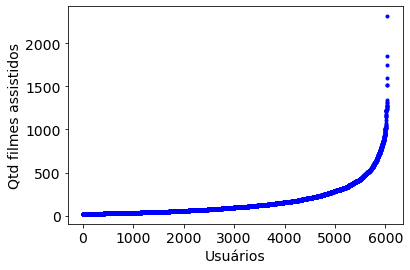

In [15]:
# Plot the distribution
distribuicao = list(users_historic.values())
distribuicao.sort()
plt.plot(distribuicao, '.', color='blue')
plt.ylabel('Qtd filmes assistidos')
plt.xlabel('Usuários')
plt.show()

In [16]:
# Other information
print("Specific information:")
print("- Mean: ", np.mean(list(users_historic.values())))
print("- Median: ", np.median(list(users_historic.values())))
print("- Min: ", np.min(list(users_historic.values())))
print("- Max: ", np.max(list(users_historic.values())))
print("- std: ", np.std(list(users_historic.values())))

Specific information:
- Mean:  165.5975165562914
- Median:  96.0
- Min:  20
- Max:  2314
- std:  192.73107252940773


### Items Popularity

In [17]:
# lista de usuários que assistiu cada item (Filme')
users_who_watched = df_ratings.groupby('itemId')['userId'].apply(list)

In [18]:
# users consumption information
items_popularity = {}
for itemid in df_ratings['itemId'].unique():
    items_popularity[itemid] = len(users_who_watched[itemid][:])

Text(0, 0.5, 'Popularidade')

Text(0.5, 0, 'Filmes')

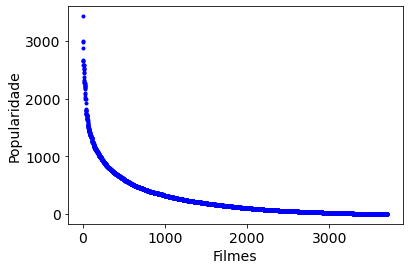

In [19]:
# Plot the distribution
distribuicao = list(items_popularity.values())
distribuicao.sort()
#[::-1] - inverte a ordenação da plotagem
plt.plot(distribuicao[::-1], '.', color='blue')
plt.ylabel('Popularidade')
plt.xlabel('Filmes')
plt.show()

In [20]:
print("Specific information:")
print("- Mean: ", np.mean(list(items_popularity.values())))
print("- Median: ", np.median(list(items_popularity.values())))
print("- Min: ", np.min(list(items_popularity.values())))
print("- Max: ", np.max(list(items_popularity.values())))
print("- std: ", np.std(list(items_popularity.values())))

Specific information:
- Mean:  269.88909875876953
- Median:  123.5
- Min:  1
- Max:  3428
- std:  383.9960197430679
